# Practical Implementation of Char LSTM Network #

## Purpose: The trained network should be able to  predict the lyrics of Song. ##

                        Flow 
                            
                    Preprocessing                    
                          |
                          |
                    Training the Network                 
                          |
                          |
                          |
                    Predicting the lyrics
                        

In [4]:
# Step1 - Import necessary libraries 

from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from pickle import load
from gtts import gTTS 
import speech_recognition as s 
from IPython.display import Audio
import numpy as np
import string
from IPython.display import Image

In [5]:
# Step 2 - Load the text file ( copy the lyrics of any song from online and create a text file )

def load_document(filename):
    file = open(filename, "r")
    text = file.read()
    file.close()
    return text

song_text = load_document("wedonttalkanymore.txt")

In [6]:
print(song_text)

We don't talk anymore, we don't talk anymore
We don't talk anymore, like we used to do
We don't love anymore
What was all of it for?
Oh, we don't talk anymore, like we used to do
I just heard you found the one you've been looking
You've been looking for
I wish I would have known that wasn't me
'Cause even after all this time I still wonder
Why I can't move on
Just the way you did so easily
Don't wanna know
What kind of dress you're wearing tonight
If he's holding onto you so tight
The way I did before
I overdosed
Should've known your love was a game
Now I can't get you out of my brain
Oh, it's such a shame
That we don't talk anymore, we don't talk anymore
We don't talk anymore, like we used to do
We don't love anymore
What was all of it for?
Oh, we don't talk anymore, like we used to do
I just hope you're lying next to somebody
Who knows how to love you like me
There must be a good reason that you're gone
Every now and then I think you
Might want me to come show up at your door
But I'm

In [7]:
tokens = song_text.split()
lyrics = ' '.join(tokens)

In [8]:
lyrics

"We don't talk anymore, we don't talk anymore We don't talk anymore, like we used to do We don't love anymore What was all of it for? Oh, we don't talk anymore, like we used to do I just heard you found the one you've been looking You've been looking for I wish I would have known that wasn't me 'Cause even after all this time I still wonder Why I can't move on Just the way you did so easily Don't wanna know What kind of dress you're wearing tonight If he's holding onto you so tight The way I did before I overdosed Should've known your love was a game Now I can't get you out of my brain Oh, it's such a shame That we don't talk anymore, we don't talk anymore We don't talk anymore, like we used to do We don't love anymore What was all of it for? Oh, we don't talk anymore, like we used to do I just hope you're lying next to somebody Who knows how to love you like me There must be a good reason that you're gone Every now and then I think you Might want me to come show up at your door But I'

In [9]:
def preprocess(text):
    text = text.lower()
    translator = str.maketrans('','', string.punctuation)
    text = text.translate(translator)
    return text

lyrics = preprocess(lyrics)

In [10]:
lyrics

'we dont talk anymore we dont talk anymore we dont talk anymore like we used to do we dont love anymore what was all of it for oh we dont talk anymore like we used to do i just heard you found the one youve been looking youve been looking for i wish i would have known that wasnt me cause even after all this time i still wonder why i cant move on just the way you did so easily dont wanna know what kind of dress youre wearing tonight if hes holding onto you so tight the way i did before i overdosed shouldve known your love was a game now i cant get you out of my brain oh its such a shame that we dont talk anymore we dont talk anymore we dont talk anymore like we used to do we dont love anymore what was all of it for oh we dont talk anymore like we used to do i just hope youre lying next to somebody who knows how to love you like me there must be a good reason that youre gone every now and then i think you might want me to come show up at your door but im just too afraid that ill be wrong

In [11]:
lyric_length = 10
ly_seq = []
for i in range(lyric_length, len(lyrics)):
    seq = lyrics[i-lyric_length:i+1] #first iteration lyrics[0:11] first 11 characters
    print(seq,len(seq))
    ly_seq.append(seq)  

we dont tal 11
e dont talk 11
 dont talk  11
dont talk a 11
ont talk an 11
nt talk any 11
t talk anym 11
 talk anymo 11
talk anymor 11
alk anymore 11
lk anymore  11
k anymore w 11
 anymore we 11
anymore we  11
nymore we d 11
ymore we do 11
more we don 11
ore we dont 11
re we dont  11
e we dont t 11
 we dont ta 11
we dont tal 11
e dont talk 11
 dont talk  11
dont talk a 11
ont talk an 11
nt talk any 11
t talk anym 11
 talk anymo 11
talk anymor 11
alk anymore 11
lk anymore  11
k anymore w 11
 anymore we 11
anymore we  11
nymore we d 11
ymore we do 11
more we don 11
ore we dont 11
re we dont  11
e we dont t 11
 we dont ta 11
we dont tal 11
e dont talk 11
 dont talk  11
dont talk a 11
ont talk an 11
nt talk any 11
t talk anym 11
 talk anymo 11
talk anymor 11
alk anymore 11
lk anymore  11
k anymore l 11
 anymore li 11
anymore lik 11
nymore like 11
ymore like  11
more like w 11
ore like we 11
re like we  11
e like we u 11
 like we us 11
like we use 11
ike we used 11
ke we used  11
e we used 

hes holding 11
es holding  11
s holding o 11
 holding on 11
holding ont 11
olding onto 11
lding onto  11
ding onto y 11
ing onto yo 11
ng onto you 11
g onto you  11
 onto you s 11
onto you so 11
nto you so  11
to you so t 11
o you so ti 11
 you so tig 11
you so tigh 11
ou so tight 11
u so tight  11
 so tight t 11
so tight th 11
o tight the 11
 tight the  11
tight the w 11
ight the wa 11
ght the way 11
ht the way  11
t the way i 11
 the way i  11
the way i d 11
he way i di 11
e way i did 11
 way i did  11
way i did b 11
ay i did be 11
y i did bef 11
 i did befo 11
i did befor 11
 did before 11
did before  11
id before w 11
d before we 11
 before we  11
before we d 11
efore we do 11
fore we don 11
ore we dont 11
re we dont  11
e we dont t 11
 we dont ta 11
we dont tal 11
e dont talk 11
 dont talk  11
dont talk a 11
ont talk an 11
nt talk any 11
t talk anym 11
 talk anymo 11
talk anymor 11
alk anymore 11
lk anymore  11
k anymore o 11
 anymore oh 11
anymore oh  11
nymore oh w 11
ymore oh w

In [12]:
print(ly_seq)

['we dont tal', 'e dont talk', ' dont talk ', 'dont talk a', 'ont talk an', 'nt talk any', 't talk anym', ' talk anymo', 'talk anymor', 'alk anymore', 'lk anymore ', 'k anymore w', ' anymore we', 'anymore we ', 'nymore we d', 'ymore we do', 'more we don', 'ore we dont', 're we dont ', 'e we dont t', ' we dont ta', 'we dont tal', 'e dont talk', ' dont talk ', 'dont talk a', 'ont talk an', 'nt talk any', 't talk anym', ' talk anymo', 'talk anymor', 'alk anymore', 'lk anymore ', 'k anymore w', ' anymore we', 'anymore we ', 'nymore we d', 'ymore we do', 'more we don', 'ore we dont', 're we dont ', 'e we dont t', ' we dont ta', 'we dont tal', 'e dont talk', ' dont talk ', 'dont talk a', 'ont talk an', 'nt talk any', 't talk anym', ' talk anymo', 'talk anymor', 'alk anymore', 'lk anymore ', 'k anymore l', ' anymore li', 'anymore lik', 'nymore like', 'ymore like ', 'more like w', 'ore like we', 're like we ', 'e like we u', ' like we us', 'like we use', 'ike we used', 'ke we used ', 'e we use

In [13]:
print("Length of the lyric sequences: %d" % len(ly_seq))

Length of the lyric sequences: 2174


In [14]:
uniq_chars = sorted(list(set(song_text)))
char_int = dict((c,i) for i,c in enumerate(uniq_chars))
int_char = dict((i,c) for i,c in enumerate(uniq_chars))

In [15]:
#These are the unique characters that appear in our lyrics
uniq_chars

['\n',
 ' ',
 "'",
 '(',
 ')',
 ',',
 '?',
 'B',
 'C',
 'D',
 'E',
 'I',
 'J',
 'L',
 'M',
 'N',
 'O',
 'S',
 'T',
 'W',
 'Y',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y']

In [16]:
#Character to Integer mapping
char_int

{'\n': 0,
 ' ': 1,
 "'": 2,
 '(': 3,
 ')': 4,
 ',': 5,
 '?': 6,
 'B': 7,
 'C': 8,
 'D': 9,
 'E': 10,
 'I': 11,
 'J': 12,
 'L': 13,
 'M': 14,
 'N': 15,
 'O': 16,
 'S': 17,
 'T': 18,
 'W': 19,
 'Y': 20,
 'a': 21,
 'b': 22,
 'c': 23,
 'd': 24,
 'e': 25,
 'f': 26,
 'g': 27,
 'h': 28,
 'i': 29,
 'j': 30,
 'k': 31,
 'l': 32,
 'm': 33,
 'n': 34,
 'o': 35,
 'p': 36,
 'r': 37,
 's': 38,
 't': 39,
 'u': 40,
 'v': 41,
 'w': 42,
 'x': 43,
 'y': 44}

In [17]:
lyric_encoded = []
for lyc in ly_seq:
    lyric_encoded.append([char_int[i] for i in lyc])

In [18]:
# We can find the first 5 encoded lyrics
lyric_encoded[:5]

[[42, 25, 1, 24, 35, 34, 39, 1, 39, 21, 32],
 [25, 1, 24, 35, 34, 39, 1, 39, 21, 32, 31],
 [1, 24, 35, 34, 39, 1, 39, 21, 32, 31, 1],
 [24, 35, 34, 39, 1, 39, 21, 32, 31, 1, 21],
 [35, 34, 39, 1, 39, 21, 32, 31, 1, 21, 34]]

In [19]:
# Suppose if we decode the first encoded lyric ie: [5, 30, 36, 33, 26, 47, 26, 37, 34, 1, 16]

''.join([int_char[lyric_encoded[0][i]] for i in range(len(lyric_encoded[0]))])

'we dont tal'

In [20]:
# The size of the vocabulary is the size of our unique words here

vocab_size = len(uniq_chars)

In [21]:
X = np.array(lyric_encoded)
X, y = X[:,:-1],X[:,-1]

In [22]:
print(X.shape, y.shape)

(2174, 10) (2174,)


In [23]:
X[0]

array([42, 25,  1, 24, 35, 34, 39,  1, 39, 21])

In [24]:
y[0]

32

In [25]:
sequences = [to_categorical(x, num_classes=vocab_size) for x in X]
X = np.array(sequences)
y = to_categorical(y, num_classes=vocab_size)

In [26]:
print(X)

[[[0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [27]:
print(X.shape, y.shape)

(2174, 10, 45) (2174, 45)


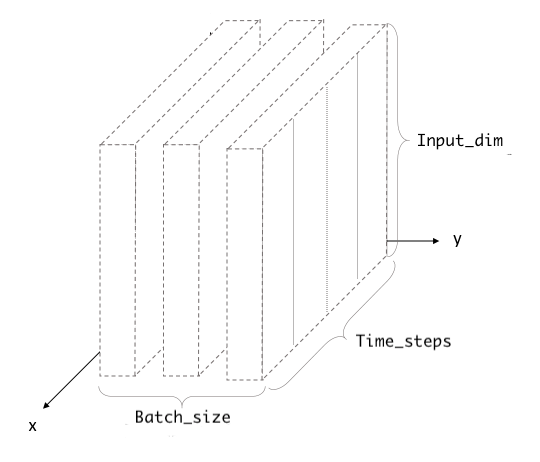

In [28]:
Image("LSTM.png")

In [29]:
# We create a LSTM model for training
#X.shape[1] = Number of timesteps (10 here as there are 10 characters)
#X.shape[2] = Number of units in one input sequence 

model = Sequential()
model.add(LSTM(units=100,input_shape=(X.shape[1],X.shape[2]),return_sequences=True))

#Dropout : Regularization
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
#Dense:  Every Neuron is connected to every other Neuron in the next layer
model.add(Dense(vocab_size, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 100)           58400     
_________________________________________________________________
dropout (Dropout)            (None, 10, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 45)                11565     
Total params: 435,533
Trainable params: 435,533
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
#verbose = 0  - > show Nothing
#verbose = 1  - > show progress bar
#verbose = 2  - > show the epoch Number and the loss, accuracy

model.fit(X, y, epochs=100, verbose=2)

Epoch 1/100
68/68 - 3s - loss: 2.9993 - accuracy: 0.2139
Epoch 2/100
68/68 - 3s - loss: 2.7754 - accuracy: 0.2157
Epoch 3/100
68/68 - 3s - loss: 2.6518 - accuracy: 0.2249
Epoch 4/100
68/68 - 3s - loss: 2.4970 - accuracy: 0.2617
Epoch 5/100
68/68 - 3s - loss: 2.3488 - accuracy: 0.3013
Epoch 6/100
68/68 - 3s - loss: 2.1675 - accuracy: 0.3588
Epoch 7/100
68/68 - 3s - loss: 1.9747 - accuracy: 0.4328
Epoch 8/100
68/68 - 3s - loss: 1.7711 - accuracy: 0.4926
Epoch 9/100
68/68 - 3s - loss: 1.5822 - accuracy: 0.5345
Epoch 10/100
68/68 - 3s - loss: 1.4628 - accuracy: 0.5745
Epoch 11/100
68/68 - 3s - loss: 1.2875 - accuracy: 0.6283
Epoch 12/100
68/68 - 3s - loss: 1.1417 - accuracy: 0.6642
Epoch 13/100
68/68 - 2s - loss: 0.9982 - accuracy: 0.7093
Epoch 14/100
68/68 - 3s - loss: 0.8990 - accuracy: 0.7346
Epoch 15/100
68/68 - 3s - loss: 0.7759 - accuracy: 0.7769
Epoch 16/100
68/68 - 3s - loss: 0.6852 - accuracy: 0.8100
Epoch 17/100
68/68 - 3s - loss: 0.5892 - accuracy: 0.8353
Epoch 18/100
68/68 - 3s

In [32]:
model.save('model_song2.h5')

In [33]:
def complete_lyric(model, mapping, seq_length, seed_text, n_chars):
    in_text = seed_text
    for _ in range(n_chars):
        encoded = [mapping[char] for char in in_text]
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        encoded = to_categorical(encoded, num_classes=vocab_size)
        yhat = model.predict_classes(encoded, verbose=0)
        out_char = ''
        for char, index in mapping.items():
            if index == yhat:
                out_char = char
                break
        in_text += char
    return in_text
 

output = complete_lyric(model, char_int, 10, "I overdosed", 200)
obj = gTTS(text=output,slow=False)
obj.save('output.mp3')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [34]:
output

'I overdosed shouldve known your love was a game now i cant get you out of my brain oh its such a shame that we dont we dont we dont we dont we dont we dont we dont we dont we dont we dont we dont we dont we dont'

## Giving input through Speech ##

In [35]:
# Input given through speech and saving the output 
sr=s.Recognizer()
print("I am all Ears...........................")
with s.Microphone() as m:
    audio=sr.listen(m)
    lyric = sr.recognize_google(audio)
    print(lyric)
output = complete_lyric(model, char_int, 10, lyric, 100)
obj = gTTS(text=output,slow=False,lang='hi')
obj.save('eng.mp3')

I am all Ears...........................


AttributeError: Could not find PyAudio; check installation

In [ ]:
#loading the Audio File
audio = Audio(filename='eng.mp3')
display(audio)

In [ ]:
output